hi
hi1
hi2


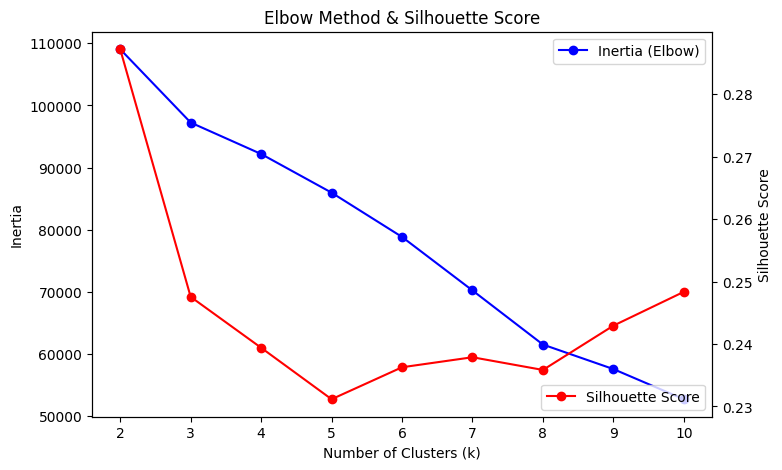

In [1]:
import sys, os

sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from src.preprocessing import Preprocessor
from src.feature_engg import FeatureEngineer


df = pd.read_csv(r"..\data\marketing_data_raw.csv")

prep = Preprocessor()
df_transformed = prep.transform(df)

fe = FeatureEngineer()
fe.fit(df_transformed)
X = fe.transforms(df_transformed)


inertia = []
silhouette = []
K = range(2, 11)  

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(X, model.labels_))

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(K, inertia, "bo-", label="Inertia (Elbow)")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia")
ax1.legend(loc="upper right")

ax2 = ax1.twinx()
ax2.plot(K, silhouette, "ro-", label="Silhouette Score")
ax2.set_ylabel("Silhouette Score")
ax2.legend(loc="lower right")

plt.title("Elbow Method & Silhouette Score")
plt.show()


In [2]:
import pandas as pd
df_final = pd.read_csv(r"..\data\DBScanclustered_customers.csv")

# Use pandas' nunique() to count the number of unique cluster labels
dbscan_labels = df_final['Cluster']
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f"--- DBSCAN Results ---")
print(f"Estimated number of clusters found: {n_clusters_}")
print(f"Estimated number of noise points (outliers): {n_noise_}")

# Display the size of each cluster
print("\nCluster sizes (including -1 for noise):")
print(dbscan_labels.value_counts())

--- DBSCAN Results ---
Estimated number of clusters found: 5
Estimated number of noise points (outliers): 489

Cluster sizes (including -1 for noise):
Cluster
 0    8439
-1     489
 1      13
 3       5
 2       4
Name: count, dtype: int64
